# Material de aula - Redes Neurais e Deep Learning


## <center> Exercício 1 - Keras: Classificação de imagens com CNN </center>

Instruções para a realização desta atividade:

1. Faça o download deste notebook Jupyter para sua estação de trabalho
2. Realize as atividades solicitadas dentro do notebook, nos espaços apropriados e indicados
3. Salve o notebook no seguinte padrão: <nome_sobrenome_RA>.ipynb (por exemplo: **rodrigo_caropreso_123456.ipynb ** )
4. Envie o notebook com a atividade realizada na sala de aula da disciplina (Google Classroom)

** DATA DE ENTREGA DESTA ATIVIDADE: 31/07/2019 **

** VALOR DESTA ATIVIDADE: 3,0 pontos **

In [1]:
#CÉLULA KE-LIB-01
import numpy as np
import keras as K
import tensorflow as tf
import pandas as pd
import seaborn as sns
import os
from keras.utils import to_categorical
import h5py
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#CÉLULA KE-LIB-02
def loadDatasets():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # features de treinamento
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # labels de treinamento

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # features de teste
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # labels de teste

    classes = np.array(test_dataset["list_classes"][:]) # lista das classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

# <center> Atividade 1 - Rede Neural Densa com 1 camada oculta </center>

### O conjunto de dados de treinamento está armazenado no formato h5 e contém imagens de gatos e imagens de objetos que não são gatos. 

### O Objetivo da atividade é construir uma Rede capaz de fazer a classificação binária entre gatos VERSUS Não-gatos

## 1.1. Instruções:

- Faça a carga do dataset através do método 

        X_train, y_train, X_test, y_test, classes = loadDatasets()

In [5]:
#IMPLEMENTE O CÓDIGO AQUI (1 linha)
X_train, y_train, X_test, y_test, classes = loadDatasets()

## 1.2. Instruções:

- Verifique a dimensão de um dado de entrada ( X_train[0] )

In [13]:
type(X_train[0])

numpy.ndarray

In [15]:
#IMPLEMENTE O CÓDIGO AQUI (1 linha)
X_train[0].shape

(64, 64, 3)

In [16]:
#print(X_train[0])  

## O código abaixo exibe uma imagem do conjunto de treinamento para a classe 'não-gato'

    index = 10
    plt.figure()
    plt.imshow(X_train[index])

## 1.3. Instruções:

- Exiba algumas imagens, no intervalo de 0 a 10, a fim de verificar como são as imagens do dataset

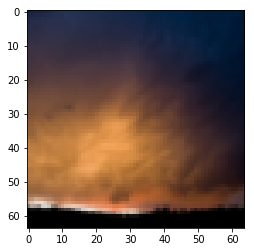

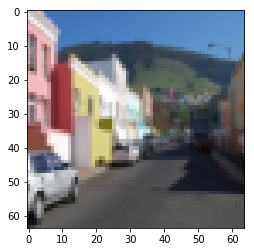

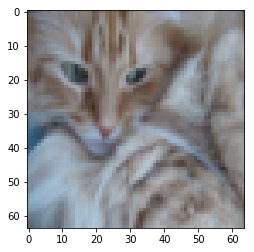

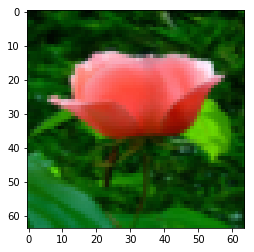

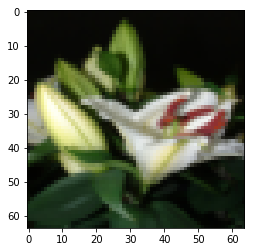

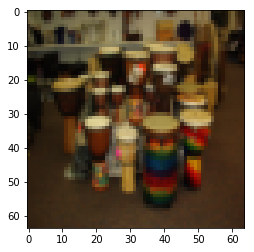

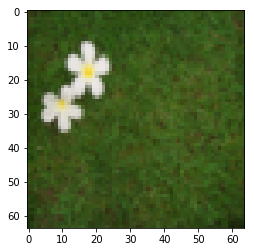

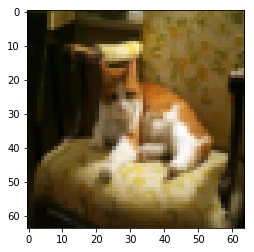

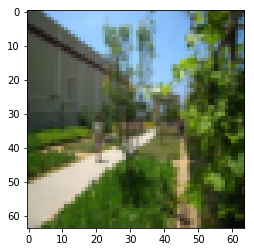

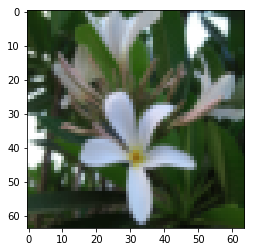

In [19]:
#IMPLEMENTE O CÓDIGO AQUI
for i in range(0,10):
    plt.figure()
    plt.imshow(X_train[i])


## Construindo a Topologia da Rede

## 1.4. Instruções:

- Faça a normalização dos dados de ENTRADA dos conjuntos de treinamento e teste pelo maior valor de pixel (255)

In [20]:
#CÉLULA KE-LIB-03
np.random.seed(4)
tf.set_random_seed(13)

#IMPLEMENTE O CÓDIGO AQUI (2 linhas)
X_train = X_train/255
X_test  = X_test/255


y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


## 1.5. Instruções:

- Faça o ajuste de dimensionalidade do tensor de entrada para 1 dimensão (flatenning)

**Nota:** não esqueça que a quantidade de entradas da rede será dada pelo tensor de entrada 'achatado em 1 dimensão' será dada por: $ 64 \cdot 64 \cdot 3 = 12288$

**Nota:** É possível redimensionar um tensor de N dimensões com o comando reshape, na forma:

    X_train_flatten = X_train.reshape(X_train.shape[0], -1)

In [22]:
#CÉLULA KE-LIB-04
#IMPLEMENTE O CÓDIGO AQUI (2 linhas)
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten  = X_test.reshape(X_test.shape[0], -1)

## 1.6. Instruções:

- Verifique as dimensoes dos vetores X_train_flatten e y_train_flatten

In [23]:
#IMPLEMENTE O CÓDIGO AQUI (2 linhas)
print(X_train_flatten.shape)
print(y_train.shape)

(209, 12288)
(209, 1)


## 1.7. Instruções:

- Construa uma topologia de uma Rede Neural Densa com 2 camadas:

        layers_dims = [12288, 20, 1] # modelo de 2 camadas densas

Dados da topologia:
- Otimizador **RMSProp**
- Função de ativação da camada intermediaria: **ReLu** 
- Função de ativação da camada de saída: **Sigmoid** 
- Utilize treinamento em lote com **batch_size= 19**
- Limite o treinamento a **2500** épocas
- Função de Perda (Loss): **binary_crossentropy** (estamos lidando com classificação binária)

In [24]:
#CÉLULA KE-LIB-05
layers_dims = [12288, 20, 1] # modelo de 2 camadas densas

tf.logging.set_verbosity(tf.logging.ERROR) #desliga os warnings do tensorflow

#Limpa o modelo previamente usado, senão irá acumular camadas
K.backend.clear_session()

#Inicializador
init = K.initializers.glorot_uniform()

#IMPLEMENTE O CÓDIGO AQUI

#Criando o otimizador
theOptimizer = K.optimizers.RMSprop()

#Construindo o modelo (topologia)
model = K.models.Sequential()

#Exemplo de input_shape na camada de entrada da rede
# model = Sequential()
# model.add(Dense(32, input_shape=(16,)))
# o modelo irá receber como entrada arrays no formato (*, 16)
# e como saída terá arrays no formato (*, 32)

#Rede Densa - IMPLEMENTE O CÓDIGO AQUI
model.add(K.layers.Dense(units=20,input_shape=(12288,), kernel_initializer=init, activation='relu'))
model.add(K.layers.Dense(units=1, kernel_initializer=init, activation='sigmoid'))

# Compile o modelo - IMPLEMENTE O CÓDIGO AQUI    
model.compile(loss='binary_crossentropy', optimizer=theOptimizer, metrics=['accuracy'])

## 1.8. Instruções:

- Execute o treinamento da rede com o comando no formato

        h = model.fit(x=X_train_flatten, y=y_train.T, batch_size=batch_size, epochs=max_epochs, verbose=1)
        
**Nota:** Pelo formato dos dados o valor de entrada deve ser inserido na forma **[N_amostras, N_Entradas]** enquanto o vetor de saída deve ser inserido no formato **[N_amostras, N_saidas]**

In [25]:
#CÉLULA KE-LIB-06
#IMPLEMENTE O CÓDIGO AQUI
batch_size = 19
max_epochs = 2500

print("Iniciando treinamento... ")
#IMPLEMENTE O CÓDIGO AQUI
h = model.fit(x=X_train_flatten, y=y_train, batch_size=batch_size, epochs=max_epochs, shuffle=True, verbose=1)

print("Treinamento finalizado \n")

Iniciando treinamento... 
Epoch 1/2500
209/209 [==============================] - 0s 2ms/step - loss: 5.1952 - acc: 0.6364
Epoch 2/2500
209/209 [==============================] - 0s 407us/step - loss: 5.1609 - acc: 0.6268
Epoch 3/2500
209/209 [==============================] - 0s 378us/step - loss: 5.4396 - acc: 0.6555
Epoch 4/2500
209/209 [==============================] - 0s 367us/step - loss: 3.2821 - acc: 0.5263
Epoch 5/2500
209/209 [==============================] - 0s 395us/step - loss: 1.2109 - acc: 0.6124
Epoch 6/2500
209/209 [==============================] - 0s 436us/step - loss: 0.9939 - acc: 0.6459
Epoch 7/2500
209/209 [==============================] - 0s 452us/step - loss: 1.8014 - acc: 0.5311
Epoch 8/2500
209/209 [==============================] - 0s 344us/step - loss: 1.0517 - acc: 0.6794
Epoch 9/2500
209/209 [==============================] - 0s 402us/step - loss: 1.2668 - acc: 0.6077
Epoch 10/2500
209/209 [==============================] - 0s 420us/step - loss: 1.5475

209/209 [==============================] - 0s 370us/step - loss: 0.4485 - acc: 0.8517
Epoch 83/2500
209/209 [==============================] - 0s 394us/step - loss: 0.4899 - acc: 0.8421
Epoch 84/2500
209/209 [==============================] - 0s 372us/step - loss: 0.4806 - acc: 0.8373
Epoch 85/2500
209/209 [==============================] - 0s 371us/step - loss: 0.4168 - acc: 0.8469
Epoch 86/2500
209/209 [==============================] - 0s 423us/step - loss: 0.5219 - acc: 0.8086
Epoch 87/2500
209/209 [==============================] - 0s 480us/step - loss: 0.3429 - acc: 0.8612
Epoch 88/2500
209/209 [==============================] - 0s 404us/step - loss: 0.5401 - acc: 0.8278
Epoch 89/2500
209/209 [==============================] - 0s 410us/step - loss: 0.3667 - acc: 0.8469
Epoch 90/2500
209/209 [==============================] - 0s 338us/step - loss: 0.4531 - acc: 0.8373
Epoch 91/2500
209/209 [==============================] - 0s 339us/step - loss: 0.2906 - acc: 0.8708
Epoch 92/2500


209/209 [==============================] - 0s 421us/step - loss: 0.3249 - acc: 0.8804
Epoch 164/2500
209/209 [==============================] - 0s 386us/step - loss: 0.1345 - acc: 0.9569
Epoch 165/2500
209/209 [==============================] - 0s 384us/step - loss: 0.2505 - acc: 0.9426
Epoch 166/2500
209/209 [==============================] - 0s 396us/step - loss: 0.1733 - acc: 0.9569
Epoch 167/2500
209/209 [==============================] - 0s 399us/step - loss: 0.0816 - acc: 0.9761
Epoch 168/2500
209/209 [==============================] - 0s 404us/step - loss: 0.3663 - acc: 0.9282
Epoch 169/2500
209/209 [==============================] - 0s 348us/step - loss: 0.1557 - acc: 0.9522
Epoch 170/2500
209/209 [==============================] - 0s 394us/step - loss: 0.2213 - acc: 0.9187
Epoch 171/2500
209/209 [==============================] - 0s 329us/step - loss: 0.3269 - acc: 0.8469
Epoch 172/2500
209/209 [==============================] - 0s 386us/step - loss: 0.0684 - acc: 0.9856
Epoch

209/209 [==============================] - 0s 374us/step - loss: 0.0346 - acc: 0.9904
Epoch 245/2500
209/209 [==============================] - 0s 354us/step - loss: 0.1501 - acc: 0.9474
Epoch 246/2500
209/209 [==============================] - 0s 365us/step - loss: 0.0168 - acc: 1.0000
Epoch 247/2500
209/209 [==============================] - 0s 360us/step - loss: 0.2858 - acc: 0.8852
Epoch 248/2500
209/209 [==============================] - 0s 324us/step - loss: 0.0161 - acc: 1.0000
Epoch 249/2500
209/209 [==============================] - 0s 349us/step - loss: 0.2782 - acc: 0.9091
Epoch 250/2500
209/209 [==============================] - 0s 361us/step - loss: 0.0160 - acc: 1.0000
Epoch 251/2500
209/209 [==============================] - 0s 386us/step - loss: 0.0249 - acc: 0.9952
Epoch 252/2500
209/209 [==============================] - 0s 415us/step - loss: 0.0490 - acc: 0.9904
Epoch 253/2500
209/209 [==============================] - 0s 357us/step - loss: 0.4094 - acc: 0.9378
Epoch

209/209 [==============================] - 0s 372us/step - loss: 0.2242 - acc: 0.9522
Epoch 326/2500
209/209 [==============================] - 0s 387us/step - loss: 0.0064 - acc: 1.0000
Epoch 327/2500
209/209 [==============================] - 0s 366us/step - loss: 0.0052 - acc: 1.0000
Epoch 328/2500
209/209 [==============================] - 0s 398us/step - loss: 0.0922 - acc: 0.9761
Epoch 329/2500
209/209 [==============================] - 0s 398us/step - loss: 0.0098 - acc: 1.0000
Epoch 330/2500
209/209 [==============================] - 0s 354us/step - loss: 0.0967 - acc: 0.9617
Epoch 331/2500
209/209 [==============================] - 0s 460us/step - loss: 0.2052 - acc: 0.9522
Epoch 332/2500
209/209 [==============================] - 0s 394us/step - loss: 0.0131 - acc: 1.0000
Epoch 333/2500
209/209 [==============================] - 0s 355us/step - loss: 0.0159 - acc: 1.0000
Epoch 334/2500
209/209 [==============================] - 0s 362us/step - loss: 0.2522 - acc: 0.9474
Epoch

209/209 [==============================] - 0s 370us/step - loss: 0.0025 - acc: 1.0000
Epoch 407/2500
209/209 [==============================] - 0s 339us/step - loss: 0.0027 - acc: 1.0000
Epoch 408/2500
209/209 [==============================] - 0s 346us/step - loss: 0.4771 - acc: 0.8947
Epoch 409/2500
209/209 [==============================] - 0s 387us/step - loss: 0.0062 - acc: 1.0000
Epoch 410/2500
209/209 [==============================] - 0s 368us/step - loss: 0.0041 - acc: 1.0000
Epoch 411/2500
209/209 [==============================] - 0s 323us/step - loss: 0.0030 - acc: 1.0000
Epoch 412/2500
209/209 [==============================] - 0s 347us/step - loss: 0.0029 - acc: 1.0000
Epoch 413/2500
209/209 [==============================] - 0s 361us/step - loss: 0.0054 - acc: 1.0000
Epoch 414/2500
209/209 [==============================] - 0s 333us/step - loss: 0.2518 - acc: 0.9474
Epoch 415/2500
209/209 [==============================] - 0s 387us/step - loss: 0.0028 - acc: 1.0000
Epoch

209/209 [==============================] - 0s 399us/step - loss: 0.0014 - acc: 1.0000
Epoch 488/2500
209/209 [==============================] - 0s 351us/step - loss: 0.3474 - acc: 0.9330
Epoch 489/2500
209/209 [==============================] - 0s 352us/step - loss: 0.0032 - acc: 1.0000
Epoch 490/2500
209/209 [==============================] - 0s 318us/step - loss: 0.0013 - acc: 1.0000
Epoch 491/2500
209/209 [==============================] - 0s 330us/step - loss: 0.0010 - acc: 1.0000
Epoch 492/2500
209/209 [==============================] - 0s 357us/step - loss: 9.4190e-04 - acc: 1.0000
Epoch 493/2500
209/209 [==============================] - 0s 334us/step - loss: 9.6611e-04 - acc: 1.0000
Epoch 494/2500
209/209 [==============================] - 0s 341us/step - loss: 0.2838 - acc: 0.9522
Epoch 495/2500
209/209 [==============================] - 0s 345us/step - loss: 0.0013 - acc: 1.0000
Epoch 496/2500
209/209 [==============================] - 0s 347us/step - loss: 0.0012 - acc: 1.00

209/209 [==============================] - 0s 409us/step - loss: 7.1929e-04 - acc: 1.0000
Epoch 567/2500
209/209 [==============================] - 0s 468us/step - loss: 6.8343e-04 - acc: 1.0000
Epoch 568/2500
209/209 [==============================] - 0s 455us/step - loss: 6.2871e-04 - acc: 1.0000
Epoch 569/2500
209/209 [==============================] - 0s 415us/step - loss: 5.6149e-04 - acc: 1.0000
Epoch 570/2500
209/209 [==============================] - 0s 329us/step - loss: 5.3288e-04 - acc: 1.0000
Epoch 571/2500
209/209 [==============================] - 0s 328us/step - loss: 6.1113e-04 - acc: 1.0000
Epoch 572/2500
209/209 [==============================] - 0s 397us/step - loss: 0.4083 - acc: 0.9569
Epoch 573/2500
209/209 [==============================] - 0s 340us/step - loss: 6.8482e-04 - acc: 1.0000
Epoch 574/2500
209/209 [==============================] - 0s 448us/step - loss: 5.0838e-04 - acc: 1.0000
Epoch 575/2500
209/209 [==============================] - 0s 589us/step - 

209/209 [==============================] - 0s 508us/step - loss: 3.6484e-04 - acc: 1.0000
Epoch 645/2500
209/209 [==============================] - 0s 431us/step - loss: 0.3342 - acc: 0.9522
Epoch 646/2500
209/209 [==============================] - 0s 402us/step - loss: 0.0310 - acc: 0.9856
Epoch 647/2500
209/209 [==============================] - 0s 376us/step - loss: 6.3048e-04 - acc: 1.0000
Epoch 648/2500
209/209 [==============================] - 0s 353us/step - loss: 4.8442e-04 - acc: 1.0000
Epoch 649/2500
209/209 [==============================] - 0s 355us/step - loss: 4.1729e-04 - acc: 1.0000
Epoch 650/2500
209/209 [==============================] - 0s 324us/step - loss: 3.5191e-04 - acc: 1.0000
Epoch 651/2500
209/209 [==============================] - 0s 370us/step - loss: 2.8675e-04 - acc: 1.0000
Epoch 652/2500
209/209 [==============================] - 0s 475us/step - loss: 2.9529e-04 - acc: 1.0000
Epoch 653/2500
209/209 [==============================] - 0s 495us/step - loss

209/209 [==============================] - 0s 447us/step - loss: 4.4898e-04 - acc: 1.0000
Epoch 723/2500
209/209 [==============================] - 0s 408us/step - loss: 0.2863 - acc: 0.9378
Epoch 724/2500
209/209 [==============================] - 0s 405us/step - loss: 3.4906e-04 - acc: 1.0000
Epoch 725/2500
209/209 [==============================] - 0s 344us/step - loss: 2.5672e-04 - acc: 1.0000
Epoch 726/2500
209/209 [==============================] - 0s 339us/step - loss: 2.0199e-04 - acc: 1.0000
Epoch 727/2500
209/209 [==============================] - 0s 344us/step - loss: 1.7914e-04 - acc: 1.0000
Epoch 728/2500
209/209 [==============================] - 0s 340us/step - loss: 1.7259e-04 - acc: 1.0000
Epoch 729/2500
209/209 [==============================] - 0s 376us/step - loss: 1.6851e-04 - acc: 1.0000
Epoch 730/2500
209/209 [==============================] - 0s 400us/step - loss: 1.9576e-04 - acc: 1.0000
Epoch 731/2500
209/209 [==============================] - 0s 406us/step - 

209/209 [==============================] - 0s 552us/step - loss: 2.3917e-04 - acc: 1.0000
Epoch 801/2500
209/209 [==============================] - 0s 476us/step - loss: 2.1051e-04 - acc: 1.0000
Epoch 802/2500
209/209 [==============================] - 0s 492us/step - loss: 1.8485e-04 - acc: 1.0000
Epoch 803/2500
209/209 [==============================] - 0s 534us/step - loss: 1.4854e-04 - acc: 1.0000
Epoch 804/2500
209/209 [==============================] - 0s 481us/step - loss: 1.2285e-04 - acc: 1.0000
Epoch 805/2500
209/209 [==============================] - 0s 419us/step - loss: 1.0486e-04 - acc: 1.0000
Epoch 806/2500
209/209 [==============================] - 0s 452us/step - loss: 1.1931e-04 - acc: 1.0000
Epoch 807/2500
209/209 [==============================] - 0s 414us/step - loss: 0.3026 - acc: 0.9378
Epoch 808/2500
209/209 [==============================] - 0s 469us/step - loss: 5.5487e-04 - acc: 1.0000
Epoch 809/2500
209/209 [==============================] - 0s 490us/step - 

209/209 [==============================] - 0s 398us/step - loss: 0.2174 - acc: 0.9569
Epoch 879/2500
209/209 [==============================] - 0s 375us/step - loss: 5.3019e-04 - acc: 1.0000
Epoch 880/2500
209/209 [==============================] - 0s 414us/step - loss: 2.5997e-04 - acc: 1.0000
Epoch 881/2500
209/209 [==============================] - 0s 497us/step - loss: 1.7190e-04 - acc: 1.0000
Epoch 882/2500
209/209 [==============================] - 0s 505us/step - loss: 1.2813e-04 - acc: 1.0000
Epoch 883/2500
209/209 [==============================] - 0s 356us/step - loss: 1.0446e-04 - acc: 1.0000
Epoch 884/2500
209/209 [==============================] - 0s 360us/step - loss: 7.9847e-05 - acc: 1.0000
Epoch 885/2500
209/209 [==============================] - 0s 384us/step - loss: 6.9891e-05 - acc: 1.0000
Epoch 886/2500
209/209 [==============================] - 0s 359us/step - loss: 5.9061e-05 - acc: 1.0000
Epoch 887/2500
209/209 [==============================] - 0s 392us/step - 

209/209 [==============================] - 0s 360us/step - loss: 0.4393 - acc: 0.9378
Epoch 957/2500
209/209 [==============================] - 0s 363us/step - loss: 1.0109e-04 - acc: 1.0000
Epoch 958/2500
209/209 [==============================] - 0s 335us/step - loss: 8.7837e-05 - acc: 1.0000
Epoch 959/2500
209/209 [==============================] - 0s 344us/step - loss: 7.2146e-05 - acc: 1.0000
Epoch 960/2500
209/209 [==============================] - 0s 348us/step - loss: 5.7975e-05 - acc: 1.0000
Epoch 961/2500
209/209 [==============================] - 0s 352us/step - loss: 4.7063e-05 - acc: 1.0000
Epoch 962/2500
209/209 [==============================] - 0s 366us/step - loss: 4.1091e-05 - acc: 1.0000
Epoch 963/2500
209/209 [==============================] - 0s 350us/step - loss: 3.8551e-05 - acc: 1.0000
Epoch 964/2500
209/209 [==============================] - 0s 341us/step - loss: 3.5615e-05 - acc: 1.0000
Epoch 965/2500
209/209 [==============================] - 0s 340us/step - 

209/209 [==============================] - 0s 420us/step - loss: 3.0337e-05 - acc: 1.0000
Epoch 1034/2500
209/209 [==============================] - 0s 392us/step - loss: 2.6880e-05 - acc: 1.0000
Epoch 1035/2500
209/209 [==============================] - 0s 385us/step - loss: 2.5345e-05 - acc: 1.0000
Epoch 1036/2500
209/209 [==============================] - 0s 400us/step - loss: 2.4346e-05 - acc: 1.0000
Epoch 1037/2500
209/209 [==============================] - 0s 367us/step - loss: 2.4673e-05 - acc: 1.0000
Epoch 1038/2500
209/209 [==============================] - 0s 401us/step - loss: 2.3792e-05 - acc: 1.0000
Epoch 1039/2500
209/209 [==============================] - 0s 385us/step - loss: 2.2686e-05 - acc: 1.0000
Epoch 1040/2500
209/209 [==============================] - 0s 371us/step - loss: 0.5027 - acc: 0.9617
Epoch 1041/2500
209/209 [==============================] - 0s 356us/step - loss: 0.3629 - acc: 0.9330
Epoch 1042/2500
209/209 [==============================] - 0s 423us/st

209/209 [==============================] - 0s 393us/step - loss: 1.3427e-05 - acc: 1.0000
Epoch 1111/2500
209/209 [==============================] - 0s 364us/step - loss: 1.3057e-05 - acc: 1.0000
Epoch 1112/2500
209/209 [==============================] - 0s 367us/step - loss: 1.5768e-05 - acc: 1.0000
Epoch 1113/2500
209/209 [==============================] - 0s 308us/step - loss: 0.6401 - acc: 0.9091
Epoch 1114/2500
209/209 [==============================] - 0s 369us/step - loss: 4.2909e-04 - acc: 1.0000
Epoch 1115/2500
209/209 [==============================] - 0s 321us/step - loss: 2.5054e-04 - acc: 1.0000
Epoch 1116/2500
209/209 [==============================] - 0s 388us/step - loss: 1.4737e-04 - acc: 1.0000
Epoch 1117/2500
209/209 [==============================] - 0s 341us/step - loss: 8.7700e-05 - acc: 1.0000
Epoch 1118/2500
209/209 [==============================] - 0s 329us/step - loss: 5.3614e-05 - acc: 1.0000
Epoch 1119/2500
209/209 [==============================] - 0s 358u

209/209 [==============================] - 0s 375us/step - loss: 1.1450e-05 - acc: 1.0000
Epoch 1188/2500
209/209 [==============================] - 0s 413us/step - loss: 9.9237e-06 - acc: 1.0000
Epoch 1189/2500
209/209 [==============================] - 0s 365us/step - loss: 9.4173e-06 - acc: 1.0000
Epoch 1190/2500
209/209 [==============================] - 0s 346us/step - loss: 9.8155e-06 - acc: 1.0000
Epoch 1191/2500
209/209 [==============================] - 0s 379us/step - loss: 9.1481e-06 - acc: 1.0000
Epoch 1192/2500
209/209 [==============================] - 0s 354us/step - loss: 0.2194 - acc: 0.9569
Epoch 1193/2500
209/209 [==============================] - 0s 327us/step - loss: 0.0283 - acc: 0.9952
Epoch 1194/2500
209/209 [==============================] - 0s 354us/step - loss: 0.2744 - acc: 0.9378
Epoch 1195/2500
209/209 [==============================] - 0s 402us/step - loss: 0.0028 - acc: 1.0000
Epoch 1196/2500
209/209 [==============================] - 0s 363us/step - los

209/209 [==============================] - 0s 381us/step - loss: 1.2767e-05 - acc: 1.0000
Epoch 1265/2500
209/209 [==============================] - 0s 355us/step - loss: 1.1687e-05 - acc: 1.0000
Epoch 1266/2500
209/209 [==============================] - 0s 426us/step - loss: 0.5292 - acc: 0.9569
Epoch 1267/2500
209/209 [==============================] - 0s 521us/step - loss: 6.2502e-05 - acc: 1.0000
Epoch 1268/2500
209/209 [==============================] - 0s 549us/step - loss: 4.0417e-05 - acc: 1.0000
Epoch 1269/2500
209/209 [==============================] - 0s 556us/step - loss: 2.9529e-05 - acc: 1.0000
Epoch 1270/2500
209/209 [==============================] - 0s 468us/step - loss: 2.1603e-05 - acc: 1.0000
Epoch 1271/2500
209/209 [==============================] - 0s 377us/step - loss: 1.5628e-05 - acc: 1.0000
Epoch 1272/2500
209/209 [==============================] - 0s 350us/step - loss: 1.2201e-05 - acc: 1.0000
Epoch 1273/2500
209/209 [==============================] - 0s 389u

209/209 [==============================] - 0s 428us/step - loss: 4.9231e-06 - acc: 1.0000
Epoch 1342/2500
209/209 [==============================] - 0s 351us/step - loss: 4.7416e-06 - acc: 1.0000
Epoch 1343/2500
209/209 [==============================] - 0s 334us/step - loss: 5.8031e-06 - acc: 1.0000
Epoch 1344/2500
209/209 [==============================] - 0s 455us/step - loss: 4.6178e-06 - acc: 1.0000
Epoch 1345/2500
209/209 [==============================] - 0s 575us/step - loss: 0.2453 - acc: 0.9665
Epoch 1346/2500
209/209 [==============================] - 0s 415us/step - loss: 5.0999e-06 - acc: 1.0000
Epoch 1347/2500
209/209 [==============================] - 0s 557us/step - loss: 5.0774e-06 - acc: 1.0000
Epoch 1348/2500
209/209 [==============================] - 0s 481us/step - loss: 5.0471e-06 - acc: 1.0000
Epoch 1349/2500
209/209 [==============================] - 0s 444us/step - loss: 4.9945e-06 - acc: 1.0000
Epoch 1350/2500
209/209 [==============================] - 0s 399u

209/209 [==============================] - 0s 355us/step - loss: 4.2425e-06 - acc: 1.0000
Epoch 1419/2500
209/209 [==============================] - 0s 371us/step - loss: 4.7284e-06 - acc: 1.0000
Epoch 1420/2500
209/209 [==============================] - 0s 332us/step - loss: 2.9811e-06 - acc: 1.0000
Epoch 1421/2500
209/209 [==============================] - 0s 335us/step - loss: 2.4497e-06 - acc: 1.0000
Epoch 1422/2500
209/209 [==============================] - 0s 403us/step - loss: 0.2868 - acc: 0.9522
Epoch 1423/2500
209/209 [==============================] - 0s 361us/step - loss: 3.5675e-05 - acc: 1.0000
Epoch 1424/2500
209/209 [==============================] - 0s 335us/step - loss: 3.2250e-05 - acc: 1.0000
Epoch 1425/2500
209/209 [==============================] - 0s 339us/step - loss: 2.7524e-05 - acc: 1.0000
Epoch 1426/2500
209/209 [==============================] - 0s 384us/step - loss: 2.2062e-05 - acc: 1.0000
Epoch 1427/2500
209/209 [==============================] - 0s 335u

209/209 [==============================] - 0s 364us/step - loss: 1.9840e-06 - acc: 1.0000
Epoch 1496/2500
209/209 [==============================] - 0s 372us/step - loss: 1.8815e-06 - acc: 1.0000
Epoch 1497/2500
209/209 [==============================] - 0s 316us/step - loss: 2.0857e-06 - acc: 1.0000
Epoch 1498/2500
209/209 [==============================] - 0s 362us/step - loss: 0.5582 - acc: 0.9139
Epoch 1499/2500
209/209 [==============================] - 0s 418us/step - loss: 3.8216e-04 - acc: 1.0000
Epoch 1500/2500
209/209 [==============================] - 0s 351us/step - loss: 1.8847e-04 - acc: 1.0000
Epoch 1501/2500
209/209 [==============================] - 0s 396us/step - loss: 9.8921e-05 - acc: 1.0000
Epoch 1502/2500
209/209 [==============================] - 0s 358us/step - loss: 5.4436e-05 - acc: 1.0000
Epoch 1503/2500
209/209 [==============================] - 0s 392us/step - loss: 3.1203e-05 - acc: 1.0000
Epoch 1504/2500
209/209 [==============================] - 0s 422u

209/209 [==============================] - 0s 359us/step - loss: 4.4830e-06 - acc: 1.0000
Epoch 1573/2500
209/209 [==============================] - 0s 448us/step - loss: 3.6834e-06 - acc: 1.0000
Epoch 1574/2500
209/209 [==============================] - 0s 368us/step - loss: 2.9593e-06 - acc: 1.0000
Epoch 1575/2500
209/209 [==============================] - 0s 378us/step - loss: 2.4206e-06 - acc: 1.0000
Epoch 1576/2500
209/209 [==============================] - 0s 346us/step - loss: 2.1060e-06 - acc: 1.0000
Epoch 1577/2500
209/209 [==============================] - 0s 347us/step - loss: 1.9336e-06 - acc: 1.0000
Epoch 1578/2500
209/209 [==============================] - 0s 320us/step - loss: 1.7633e-06 - acc: 1.0000
Epoch 1579/2500
209/209 [==============================] - 0s 341us/step - loss: 1.6615e-06 - acc: 1.0000
Epoch 1580/2500
209/209 [==============================] - 0s 348us/step - loss: 1.3530e-06 - acc: 1.0000
Epoch 1581/2500
209/209 [==============================] - 0s 

209/209 [==============================] - 0s 344us/step - loss: 8.1599e-07 - acc: 1.0000
Epoch 1650/2500
209/209 [==============================] - 0s 387us/step - loss: 8.3838e-07 - acc: 1.0000
Epoch 1651/2500
209/209 [==============================] - 0s 389us/step - loss: 0.2262 - acc: 0.9617
Epoch 1652/2500
209/209 [==============================] - 0s 394us/step - loss: 0.2810 - acc: 0.9378
Epoch 1653/2500
209/209 [==============================] - 0s 392us/step - loss: 1.8223e-04 - acc: 1.0000
Epoch 1654/2500
209/209 [==============================] - 0s 376us/step - loss: 1.0733e-04 - acc: 1.0000
Epoch 1655/2500
209/209 [==============================] - 0s 412us/step - loss: 6.3662e-05 - acc: 1.0000
Epoch 1656/2500
209/209 [==============================] - 0s 390us/step - loss: 3.6856e-05 - acc: 1.0000
Epoch 1657/2500
209/209 [==============================] - 0s 396us/step - loss: 2.3474e-05 - acc: 1.0000
Epoch 1658/2500
209/209 [==============================] - 0s 431us/st

209/209 [==============================] - 0s 397us/step - loss: 0.0251 - acc: 0.9904
Epoch 1727/2500
209/209 [==============================] - 0s 362us/step - loss: 1.3659e-05 - acc: 1.0000
Epoch 1728/2500
209/209 [==============================] - 0s 359us/step - loss: 1.3433e-05 - acc: 1.0000
Epoch 1729/2500
209/209 [==============================] - 0s 384us/step - loss: 1.2854e-05 - acc: 1.0000
Epoch 1730/2500
209/209 [==============================] - 0s 375us/step - loss: 1.2215e-05 - acc: 1.0000
Epoch 1731/2500
209/209 [==============================] - 0s 338us/step - loss: 1.1561e-05 - acc: 1.0000
Epoch 1732/2500
209/209 [==============================] - 0s 359us/step - loss: 1.0660e-05 - acc: 1.0000
Epoch 1733/2500
209/209 [==============================] - 0s 337us/step - loss: 9.8489e-06 - acc: 1.0000
Epoch 1734/2500
209/209 [==============================] - 0s 400us/step - loss: 8.3884e-06 - acc: 1.0000
Epoch 1735/2500
209/209 [==============================] - 0s 333u

209/209 [==============================] - 0s 424us/step - loss: 6.7160e-07 - acc: 1.0000
Epoch 1804/2500
209/209 [==============================] - 0s 399us/step - loss: 6.7079e-07 - acc: 1.0000
Epoch 1805/2500
209/209 [==============================] - 0s 357us/step - loss: 6.6385e-07 - acc: 1.0000
Epoch 1806/2500
209/209 [==============================] - 0s 358us/step - loss: 6.5686e-07 - acc: 1.0000
Epoch 1807/2500
209/209 [==============================] - 0s 410us/step - loss: 6.4561e-07 - acc: 1.0000
Epoch 1808/2500
209/209 [==============================] - 0s 363us/step - loss: 6.2233e-07 - acc: 1.0000
Epoch 1809/2500
209/209 [==============================] - 0s 368us/step - loss: 5.8939e-07 - acc: 1.0000
Epoch 1810/2500
209/209 [==============================] - 0s 323us/step - loss: 5.4738e-07 - acc: 1.0000
Epoch 1811/2500
209/209 [==============================] - 0s 364us/step - loss: 5.1139e-07 - acc: 1.0000
Epoch 1812/2500
209/209 [==============================] - 0s 

209/209 [==============================] - 0s 373us/step - loss: 7.0718e-06 - acc: 1.0000
Epoch 1881/2500
209/209 [==============================] - 0s 375us/step - loss: 6.9102e-06 - acc: 1.0000
Epoch 1882/2500
209/209 [==============================] - 0s 555us/step - loss: 6.6609e-06 - acc: 1.0000
Epoch 1883/2500
209/209 [==============================] - 0s 540us/step - loss: 6.2256e-06 - acc: 1.0000
Epoch 1884/2500
209/209 [==============================] - 0s 366us/step - loss: 5.6104e-06 - acc: 1.0000
Epoch 1885/2500
209/209 [==============================] - 0s 338us/step - loss: 4.8617e-06 - acc: 1.0000
Epoch 1886/2500
209/209 [==============================] - 0s 323us/step - loss: 3.7970e-06 - acc: 1.0000
Epoch 1887/2500
209/209 [==============================] - 0s 395us/step - loss: 2.7560e-06 - acc: 1.0000
Epoch 1888/2500
209/209 [==============================] - 0s 365us/step - loss: 1.8973e-06 - acc: 1.0000
Epoch 1889/2500
209/209 [==============================] - 0s 

209/209 [==============================] - 0s 385us/step - loss: 4.4773e-07 - acc: 1.0000
Epoch 1958/2500
209/209 [==============================] - 0s 356us/step - loss: 3.1523e-07 - acc: 1.0000
Epoch 1959/2500
209/209 [==============================] - 0s 411us/step - loss: 2.6124e-07 - acc: 1.0000
Epoch 1960/2500
209/209 [==============================] - 0s 381us/step - loss: 2.2845e-07 - acc: 1.0000
Epoch 1961/2500
209/209 [==============================] - 0s 348us/step - loss: 2.1579e-07 - acc: 1.0000
Epoch 1962/2500
209/209 [==============================] - 0s 392us/step - loss: 2.6429e-07 - acc: 1.0000
Epoch 1963/2500
209/209 [==============================] - 0s 354us/step - loss: 2.1236e-07 - acc: 1.0000
Epoch 1964/2500
209/209 [==============================] - 0s 373us/step - loss: 0.3337 - acc: 0.9569
Epoch 1965/2500
209/209 [==============================] - 0s 360us/step - loss: 1.9908e-04 - acc: 1.0000
Epoch 1966/2500
209/209 [==============================] - 0s 548u

209/209 [==============================] - 0s 413us/step - loss: 1.4450e-05 - acc: 1.0000
Epoch 2035/2500
209/209 [==============================] - 0s 388us/step - loss: 8.1490e-06 - acc: 1.0000
Epoch 2036/2500
209/209 [==============================] - 0s 371us/step - loss: 4.9831e-06 - acc: 1.0000
Epoch 2037/2500
209/209 [==============================] - 0s 407us/step - loss: 2.9281e-06 - acc: 1.0000
Epoch 2038/2500
209/209 [==============================] - 0s 378us/step - loss: 1.7742e-06 - acc: 1.0000
Epoch 2039/2500
209/209 [==============================] - 0s 364us/step - loss: 1.0731e-06 - acc: 1.0000
Epoch 2040/2500
209/209 [==============================] - 0s 361us/step - loss: 6.7238e-07 - acc: 1.0000
Epoch 2041/2500
209/209 [==============================] - 0s 342us/step - loss: 4.1818e-07 - acc: 1.0000
Epoch 2042/2500
209/209 [==============================] - 0s 472us/step - loss: 2.9846e-07 - acc: 1.0000
Epoch 2043/2500
209/209 [==============================] - 0s 

209/209 [==============================] - 0s 494us/step - loss: 1.3289e-07 - acc: 1.0000
Epoch 2112/2500
209/209 [==============================] - 0s 368us/step - loss: 1.2906e-07 - acc: 1.0000
Epoch 2113/2500
209/209 [==============================] - 0s 321us/step - loss: 1.2976e-07 - acc: 1.0000
Epoch 2114/2500
209/209 [==============================] - 0s 335us/step - loss: 1.3773e-07 - acc: 1.0000
Epoch 2115/2500
209/209 [==============================] - 0s 329us/step - loss: 1.3593e-07 - acc: 1.0000
Epoch 2116/2500
209/209 [==============================] - 0s 341us/step - loss: 1.2943e-07 - acc: 1.0000
Epoch 2117/2500
209/209 [==============================] - 0s 347us/step - loss: 1.2132e-07 - acc: 1.0000
Epoch 2118/2500
209/209 [==============================] - 0s 329us/step - loss: 0.1901 - acc: 0.9856
Epoch 2119/2500
209/209 [==============================] - 0s 360us/step - loss: 6.8772e-05 - acc: 1.0000
Epoch 2120/2500
209/209 [==============================] - 0s 349u

209/209 [==============================] - 0s 354us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2189/2500
209/209 [==============================] - 0s 390us/step - loss: 1.0685e-07 - acc: 1.0000
Epoch 2190/2500
209/209 [==============================] - 0s 404us/step - loss: 1.0694e-07 - acc: 1.0000
Epoch 2191/2500
209/209 [==============================] - 0s 394us/step - loss: 1.0671e-07 - acc: 1.0000
Epoch 2192/2500
209/209 [==============================] - 0s 358us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2193/2500
209/209 [==============================] - 0s 383us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2194/2500
209/209 [==============================] - 0s 328us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2195/2500
209/209 [==============================] - 0s 348us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2196/2500
209/209 [==============================] - 0s 332us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2197/2500
209/209 [==============================] - 0s 

209/209 [==============================] - 0s 462us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2266/2500
209/209 [==============================] - 0s 512us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2267/2500
209/209 [==============================] - 0s 479us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2268/2500
209/209 [==============================] - 0s 371us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2269/2500
209/209 [==============================] - 0s 550us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2270/2500
209/209 [==============================] - 0s 582us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2271/2500
209/209 [==============================] - 0s 374us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2272/2500
209/209 [==============================] - 0s 412us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2273/2500
209/209 [==============================] - 0s 520us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2274/2500
209/209 [==============================] - 0s 

209/209 [==============================] - 0s 357us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2343/2500
209/209 [==============================] - 0s 362us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2344/2500
209/209 [==============================] - 0s 534us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2345/2500
209/209 [==============================] - 0s 494us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2346/2500
209/209 [==============================] - 0s 471us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2347/2500
209/209 [==============================] - 0s 343us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2348/2500
209/209 [==============================] - 0s 324us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2349/2500
209/209 [==============================] - 0s 360us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2350/2500
209/209 [==============================] - 0s 330us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2351/2500
209/209 [==============================] - 0s 

209/209 [==============================] - 0s 350us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2420/2500
209/209 [==============================] - 0s 348us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2421/2500
209/209 [==============================] - 0s 358us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2422/2500
209/209 [==============================] - 0s 372us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2423/2500
209/209 [==============================] - 0s 343us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2424/2500
209/209 [==============================] - 0s 386us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2425/2500
209/209 [==============================] - 0s 379us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2426/2500
209/209 [==============================] - 0s 345us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2427/2500
209/209 [==============================] - 0s 366us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2428/2500
209/209 [==============================] - 0s 

209/209 [==============================] - 0s 367us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2497/2500
209/209 [==============================] - 0s 373us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2498/2500
209/209 [==============================] - 0s 348us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2499/2500
209/209 [==============================] - 0s 328us/step - loss: 1.0662e-07 - acc: 1.0000
Epoch 2500/2500
209/209 [==============================] - 0s 336us/step - loss: 1.0662e-07 - acc: 1.0000
Treinamento finalizado 



## 1.9. Instruções:

- Faça a verificação dos resultados dos conjuntos de **treinamento E teste** a partir do comando

        eval = model.evaluate(X_train_flatten, y_train.T, verbose=0)

**Nota:**  observe que o comando acima faz a validação do conjunto de treinamento apenas. Além disso, o formato dos dados de entrada segue o mesmo padrão utilizado no comando de treinamento

In [26]:
#CÉLULA KE-LIB-07
#IMPLEMENTE O CÓDIGO AQUI
eval = model.evaluate(X_train_flatten, y_train, verbose=0)
print("Erro médio do conjunto de treinamento: Perda {0:.4f}, acuracia {1:.4f}".format(eval[0], eval[1]*100))

eval = model.evaluate(X_test_flatten, y_test, verbose=0)
print("Erro médio do conjunto de teste: Perda {0:.4f}, acuracia {1:.4f}".format(eval[0], eval[1]*100))

Erro médio do conjunto de treinamento: Perda 0.0000, acuracia 100.0000
Erro médio do conjunto de teste: Perda 4.4541, acuracia 64.0000


# <center> Atividade 2 - Rede Neural Densa com 2 camadas ocultas </center>

## 2.1. Instruções:

- Construa uma nova topologia de rede com 4 camadas:
- Refaça o treinamento e compare os resultados

    layers_dims = [12288, 20, 7, 5, 1] # modelo de 4 camadas densas
    
Dados da topologia:
- Otimizador **RMSProp**
- Função de ativação da primeira camada oculta: **ReLu** 
- Função de ativação da segunda camada oculta: **ReLu** 
- Função de ativação da terceira camada oculta: **ReLu** 
- Função de ativação da camada de saída: **Sigmoid** 
- Utilize treinamento em lote com **batch_size= 19**
- Limite o treinamento a **2500** épocas
- Função de Perda (Loss): **binary_crossentropy** (estamos lidando com classificação binária)    

In [27]:
X_train, y_train, X_test, y_test, classes = loadDatasets()

X_train = X_train / 255
X_test = X_test / 255

X_train_flatten = X_train.reshape(X_train.shape[0], -1)   # The "-1" makes reshape flatten the remaining dimensions
X_test_flatten  = X_test.reshape(X_test.shape[0], -1)


In [28]:
#CÉLULA KE-LIB-08
layers_dims = [12288, 20, 7, 5, 1] # modelo de 4 camadas densas

tf.logging.set_verbosity(tf.logging.ERROR) #desliga os warnings do tensorflow

#Limpa o modelo previamente usado, senão irá acumular camadas
K.backend.clear_session()

#Inicializador
init = K.initializers.glorot_uniform()

#IMPLEMENTE O CÓDIGO AQUI
#Criando o otimizador
theOptimizer = K.optimizers.RMSprop()

#Construindo o modelo (topologia)
model = K.models.Sequential()

#Rede Densa - IMPLEMENTE O CÓDIGO AQUI
model.add(K.layers.Dense(units=20,input_shape=(12288,), kernel_initializer=init, activation='relu'))
model.add(K.layers.Dense(units=7, kernel_initializer=init, activation='relu'))
model.add(K.layers.Dense(units=5, kernel_initializer=init, activation='relu'))
model.add(K.layers.Dense(units=1, kernel_initializer=init, activation='sigmoid'))

#Compile o modelo - IMPLEMENTE O CÓDIGO AQUI
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [29]:
#CÉLULA KE-LIB-09
#IMPLEMENTE O CÓDIGO AQUI
batch_size = 19
max_epochs = 2500

print("Iniciando treinamento... ")
#IMPLEMENTE O CÓDIGO AQUI
h = model.fit(x=X_train_flatten, y=y_train.T, batch_size=batch_size, epochs=max_epochs, shuffle=True, verbose=1)

print("Treinamento finalizado \n")

Iniciando treinamento... 
Epoch 1/2500
209/209 [==============================] - 0s 1ms/step - loss: 0.8635 - acc: 0.6364
Epoch 2/2500
209/209 [==============================] - 0s 387us/step - loss: 0.6627 - acc: 0.6555
Epoch 3/2500
209/209 [==============================] - 0s 394us/step - loss: 0.6525 - acc: 0.6555
Epoch 4/2500
209/209 [==============================] - 0s 391us/step - loss: 0.6572 - acc: 0.6699
Epoch 5/2500
209/209 [==============================] - 0s 442us/step - loss: 0.6502 - acc: 0.6699
Epoch 6/2500
209/209 [==============================] - 0s 388us/step - loss: 0.6075 - acc: 0.6794
Epoch 7/2500
209/209 [==============================] - 0s 421us/step - loss: 0.6159 - acc: 0.6507
Epoch 8/2500
209/209 [==============================] - 0s 376us/step - loss: 0.6065 - acc: 0.6603
Epoch 9/2500
209/209 [==============================] - 0s 416us/step - loss: 0.6054 - acc: 0.6842
Epoch 10/2500
209/209 [==============================] - 0s 472us/step - loss: 0.5941

209/209 [==============================] - 0s 431us/step - loss: 0.3333 - acc: 0.8469
Epoch 83/2500
209/209 [==============================] - 0s 545us/step - loss: 0.3618 - acc: 0.8134
Epoch 84/2500
209/209 [==============================] - 0s 555us/step - loss: 0.2807 - acc: 0.8995
Epoch 85/2500
209/209 [==============================] - 0s 330us/step - loss: 0.3387 - acc: 0.8325
Epoch 86/2500
209/209 [==============================] - 0s 379us/step - loss: 0.3034 - acc: 0.8612
Epoch 87/2500
209/209 [==============================] - 0s 380us/step - loss: 0.3794 - acc: 0.8421
Epoch 88/2500
209/209 [==============================] - 0s 364us/step - loss: 0.2722 - acc: 0.8852
Epoch 89/2500
209/209 [==============================] - 0s 320us/step - loss: 0.3261 - acc: 0.8660
Epoch 90/2500
209/209 [==============================] - 0s 379us/step - loss: 0.3603 - acc: 0.8612
Epoch 91/2500
209/209 [==============================] - 0s 339us/step - loss: 0.2657 - acc: 0.9091
Epoch 92/2500


209/209 [==============================] - 0s 359us/step - loss: 0.1741 - acc: 0.9330
Epoch 164/2500
209/209 [==============================] - 0s 359us/step - loss: 0.2299 - acc: 0.9187
Epoch 165/2500
209/209 [==============================] - 0s 330us/step - loss: 0.1523 - acc: 0.9522
Epoch 166/2500
209/209 [==============================] - 0s 350us/step - loss: 0.1452 - acc: 0.9569
Epoch 167/2500
209/209 [==============================] - 0s 371us/step - loss: 0.1647 - acc: 0.9378
Epoch 168/2500
209/209 [==============================] - 0s 315us/step - loss: 0.2152 - acc: 0.9091
Epoch 169/2500
209/209 [==============================] - 0s 342us/step - loss: 0.2336 - acc: 0.8995
Epoch 170/2500
209/209 [==============================] - 0s 363us/step - loss: 0.1320 - acc: 0.9617
Epoch 171/2500
209/209 [==============================] - 0s 392us/step - loss: 0.1875 - acc: 0.9330
Epoch 172/2500
209/209 [==============================] - 0s 370us/step - loss: 0.1683 - acc: 0.9426
Epoch

209/209 [==============================] - 0s 408us/step - loss: 0.0850 - acc: 0.9761
Epoch 245/2500
209/209 [==============================] - 0s 584us/step - loss: 0.0547 - acc: 0.9904
Epoch 246/2500
209/209 [==============================] - 0s 514us/step - loss: 0.2560 - acc: 0.9234
Epoch 247/2500
209/209 [==============================] - 0s 410us/step - loss: 0.0566 - acc: 0.9904
Epoch 248/2500
209/209 [==============================] - 0s 469us/step - loss: 0.0578 - acc: 0.9856
Epoch 249/2500
209/209 [==============================] - 0s 490us/step - loss: 0.0534 - acc: 0.9904
Epoch 250/2500
209/209 [==============================] - 0s 325us/step - loss: 0.1254 - acc: 0.9522
Epoch 251/2500
209/209 [==============================] - 0s 362us/step - loss: 0.1698 - acc: 0.9282
Epoch 252/2500
209/209 [==============================] - 0s 628us/step - loss: 0.0538 - acc: 0.9904
Epoch 253/2500
209/209 [==============================] - 0s 370us/step - loss: 0.0561 - acc: 0.9856
Epoch

209/209 [==============================] - 0s 358us/step - loss: 0.0293 - acc: 0.9952
Epoch 326/2500
209/209 [==============================] - 0s 346us/step - loss: 0.1923 - acc: 0.9282
Epoch 327/2500
209/209 [==============================] - 0s 331us/step - loss: 0.0296 - acc: 0.9952
Epoch 328/2500
209/209 [==============================] - 0s 354us/step - loss: 0.0298 - acc: 0.9952
Epoch 329/2500
209/209 [==============================] - 0s 374us/step - loss: 0.0294 - acc: 0.9952
Epoch 330/2500
209/209 [==============================] - 0s 335us/step - loss: 0.1860 - acc: 0.9378
Epoch 331/2500
209/209 [==============================] - 0s 340us/step - loss: 0.0294 - acc: 0.9952
Epoch 332/2500
209/209 [==============================] - 0s 356us/step - loss: 0.0287 - acc: 0.9952
Epoch 333/2500
209/209 [==============================] - 0s 343us/step - loss: 0.0314 - acc: 0.9952
Epoch 334/2500
209/209 [==============================] - 0s 354us/step - loss: 0.0309 - acc: 0.9952
Epoch

209/209 [==============================] - 0s 353us/step - loss: 0.0256 - acc: 0.9952
Epoch 407/2500
209/209 [==============================] - 0s 401us/step - loss: 0.0256 - acc: 0.9952
Epoch 408/2500
209/209 [==============================] - 0s 351us/step - loss: 0.0257 - acc: 0.9952
Epoch 409/2500
209/209 [==============================] - 0s 402us/step - loss: 0.0256 - acc: 0.9952
Epoch 410/2500
209/209 [==============================] - 0s 388us/step - loss: 0.1978 - acc: 0.9474
Epoch 411/2500
209/209 [==============================] - 0s 410us/step - loss: 0.0256 - acc: 0.9952
Epoch 412/2500
209/209 [==============================] - 0s 407us/step - loss: 0.0257 - acc: 0.9952
Epoch 413/2500
209/209 [==============================] - 0s 358us/step - loss: 0.0840 - acc: 0.9713
Epoch 414/2500
209/209 [==============================] - 0s 346us/step - loss: 0.0301 - acc: 0.9904
Epoch 415/2500
209/209 [==============================] - 0s 323us/step - loss: 0.0255 - acc: 0.9952
Epoch

209/209 [==============================] - 0s 422us/step - loss: 0.0254 - acc: 0.9952
Epoch 488/2500
209/209 [==============================] - 0s 386us/step - loss: 0.0397 - acc: 0.9904
Epoch 489/2500
209/209 [==============================] - 0s 383us/step - loss: 0.1180 - acc: 0.9522
Epoch 490/2500
209/209 [==============================] - 0s 364us/step - loss: 0.0258 - acc: 0.9952
Epoch 491/2500
209/209 [==============================] - 0s 345us/step - loss: 0.0254 - acc: 0.9952
Epoch 492/2500
209/209 [==============================] - 0s 316us/step - loss: 0.0254 - acc: 0.9952
Epoch 493/2500
209/209 [==============================] - 0s 349us/step - loss: 0.0254 - acc: 0.9952
Epoch 494/2500
209/209 [==============================] - 0s 365us/step - loss: 0.0255 - acc: 0.9952
Epoch 495/2500
209/209 [==============================] - 0s 336us/step - loss: 0.2244 - acc: 0.9522
Epoch 496/2500
209/209 [==============================] - 0s 369us/step - loss: 0.0585 - acc: 0.9856
Epoch

209/209 [==============================] - 0s 359us/step - loss: 0.1833 - acc: 0.9522
Epoch 569/2500
209/209 [==============================] - 0s 323us/step - loss: 0.0262 - acc: 0.9952
Epoch 570/2500
209/209 [==============================] - 0s 388us/step - loss: 0.0253 - acc: 0.9952
Epoch 571/2500
209/209 [==============================] - 0s 413us/step - loss: 0.0253 - acc: 0.9952
Epoch 572/2500
209/209 [==============================] - 0s 382us/step - loss: 0.0254 - acc: 0.9952
Epoch 573/2500
209/209 [==============================] - 0s 350us/step - loss: 0.0255 - acc: 0.9952
Epoch 574/2500
209/209 [==============================] - 0s 412us/step - loss: 0.0254 - acc: 0.9952
Epoch 575/2500
209/209 [==============================] - 0s 353us/step - loss: 0.0254 - acc: 0.9952
Epoch 576/2500
209/209 [==============================] - 0s 363us/step - loss: 0.6742 - acc: 0.9378
Epoch 577/2500
209/209 [==============================] - 0s 326us/step - loss: 0.1153 - acc: 0.9713
Epoch

209/209 [==============================] - 0s 354us/step - loss: 0.0253 - acc: 0.9952
Epoch 650/2500
209/209 [==============================] - 0s 387us/step - loss: 0.0253 - acc: 0.9952
Epoch 651/2500
209/209 [==============================] - 0s 342us/step - loss: 0.0253 - acc: 0.9952
Epoch 652/2500
209/209 [==============================] - 0s 331us/step - loss: 0.0253 - acc: 0.9952
Epoch 653/2500
209/209 [==============================] - 0s 348us/step - loss: 0.0254 - acc: 0.9952
Epoch 654/2500
209/209 [==============================] - 0s 372us/step - loss: 0.0254 - acc: 0.9952
Epoch 655/2500
209/209 [==============================] - 0s 380us/step - loss: 0.0254 - acc: 0.9952
Epoch 656/2500
209/209 [==============================] - 0s 352us/step - loss: 0.0254 - acc: 0.9952
Epoch 657/2500
209/209 [==============================] - 0s 427us/step - loss: 0.0254 - acc: 0.9952
Epoch 658/2500
209/209 [==============================] - 0s 353us/step - loss: 0.6330 - acc: 0.9187
Epoch

209/209 [==============================] - 0s 426us/step - loss: 0.0254 - acc: 0.9952
Epoch 731/2500
209/209 [==============================] - 0s 357us/step - loss: 0.0254 - acc: 0.9952
Epoch 732/2500
209/209 [==============================] - 0s 350us/step - loss: 0.0674 - acc: 0.9809
Epoch 733/2500
209/209 [==============================] - 0s 342us/step - loss: 0.0254 - acc: 0.9952
Epoch 734/2500
209/209 [==============================] - 0s 359us/step - loss: 0.0254 - acc: 0.9952
Epoch 735/2500
209/209 [==============================] - 0s 326us/step - loss: 0.0254 - acc: 0.9952
Epoch 736/2500
209/209 [==============================] - 0s 392us/step - loss: 0.0254 - acc: 0.9952
Epoch 737/2500
209/209 [==============================] - 0s 400us/step - loss: 0.5815 - acc: 0.9139
Epoch 738/2500
209/209 [==============================] - 0s 369us/step - loss: 0.0257 - acc: 0.9952
Epoch 739/2500
209/209 [==============================] - 0s 374us/step - loss: 0.0254 - acc: 0.9952
Epoch

209/209 [==============================] - 0s 452us/step - loss: 0.0254 - acc: 0.9952
Epoch 812/2500
209/209 [==============================] - 0s 441us/step - loss: 0.6169 - acc: 0.9378
Epoch 813/2500
209/209 [==============================] - 0s 389us/step - loss: 0.0255 - acc: 0.9952
Epoch 814/2500
209/209 [==============================] - 0s 372us/step - loss: 0.0255 - acc: 0.9952
Epoch 815/2500
209/209 [==============================] - 0s 489us/step - loss: 0.0254 - acc: 0.9952
Epoch 816/2500
209/209 [==============================] - 0s 418us/step - loss: 0.0254 - acc: 0.9952
Epoch 817/2500
209/209 [==============================] - 0s 430us/step - loss: 0.0254 - acc: 0.9952
Epoch 818/2500
209/209 [==============================] - 0s 500us/step - loss: 0.0255 - acc: 0.9952
Epoch 819/2500
209/209 [==============================] - 0s 596us/step - loss: 0.0254 - acc: 0.9952
Epoch 820/2500
209/209 [==============================] - 0s 380us/step - loss: 0.0254 - acc: 0.9952
Epoch

209/209 [==============================] - 0s 363us/step - loss: 0.0254 - acc: 0.9952
Epoch 893/2500
209/209 [==============================] - 0s 380us/step - loss: 0.0359 - acc: 0.9856
Epoch 894/2500
209/209 [==============================] - 0s 345us/step - loss: 0.2169 - acc: 0.9522
Epoch 895/2500
209/209 [==============================] - 0s 339us/step - loss: 0.0256 - acc: 0.9952
Epoch 896/2500
209/209 [==============================] - 0s 399us/step - loss: 0.0255 - acc: 0.9952
Epoch 897/2500
209/209 [==============================] - 0s 335us/step - loss: 0.0254 - acc: 0.9952
Epoch 898/2500
209/209 [==============================] - 0s 396us/step - loss: 0.0254 - acc: 0.9952
Epoch 899/2500
209/209 [==============================] - 0s 335us/step - loss: 0.0254 - acc: 0.9952
Epoch 900/2500
209/209 [==============================] - 0s 363us/step - loss: 0.0278 - acc: 0.9952
Epoch 901/2500
209/209 [==============================] - 0s 369us/step - loss: 0.0359 - acc: 0.9904
Epoch

209/209 [==============================] - 0s 398us/step - loss: 0.0254 - acc: 0.9952
Epoch 974/2500
209/209 [==============================] - 0s 389us/step - loss: 0.0254 - acc: 0.9952
Epoch 975/2500
209/209 [==============================] - 0s 410us/step - loss: 0.0254 - acc: 0.9952
Epoch 976/2500
209/209 [==============================] - 0s 352us/step - loss: 0.0254 - acc: 0.9952
Epoch 977/2500
209/209 [==============================] - 0s 362us/step - loss: 0.0254 - acc: 0.9952
Epoch 978/2500
209/209 [==============================] - 0s 494us/step - loss: 0.1246 - acc: 0.9617
Epoch 979/2500
209/209 [==============================] - 0s 439us/step - loss: 0.0258 - acc: 0.9952
Epoch 980/2500
209/209 [==============================] - 0s 447us/step - loss: 0.0255 - acc: 0.9952
Epoch 981/2500
209/209 [==============================] - 0s 464us/step - loss: 0.0254 - acc: 0.9952
Epoch 982/2500
209/209 [==============================] - 0s 388us/step - loss: 0.0254 - acc: 0.9952
Epoch

209/209 [==============================] - 0s 436us/step - loss: 0.0254 - acc: 0.9952
Epoch 1054/2500
209/209 [==============================] - 0s 372us/step - loss: 0.0254 - acc: 0.9952
Epoch 1055/2500
209/209 [==============================] - 0s 405us/step - loss: 0.0472 - acc: 0.9856
Epoch 1056/2500
209/209 [==============================] - 0s 391us/step - loss: 0.0254 - acc: 0.9952
Epoch 1057/2500
209/209 [==============================] - 0s 372us/step - loss: 0.0254 - acc: 0.9952
Epoch 1058/2500
209/209 [==============================] - 0s 383us/step - loss: 0.0254 - acc: 0.9952
Epoch 1059/2500
209/209 [==============================] - 0s 343us/step - loss: 0.0254 - acc: 0.9952
Epoch 1060/2500
209/209 [==============================] - 0s 401us/step - loss: 0.0254 - acc: 0.9952
Epoch 1061/2500
209/209 [==============================] - 0s 388us/step - loss: 0.0254 - acc: 0.9952
Epoch 1062/2500
209/209 [==============================] - 0s 344us/step - loss: 0.1242 - acc: 0.9

209/209 [==============================] - 0s 450us/step - loss: 0.0254 - acc: 0.9952
Epoch 1134/2500
209/209 [==============================] - 0s 430us/step - loss: 0.3004 - acc: 0.9665
Epoch 1135/2500
209/209 [==============================] - 0s 547us/step - loss: 0.0261 - acc: 0.9952
Epoch 1136/2500
209/209 [==============================] - 0s 413us/step - loss: 0.0256 - acc: 0.9952
Epoch 1137/2500
209/209 [==============================] - 0s 377us/step - loss: 0.0255 - acc: 0.9952
Epoch 1138/2500
209/209 [==============================] - 0s 386us/step - loss: 0.0255 - acc: 0.9952
Epoch 1139/2500
209/209 [==============================] - 0s 379us/step - loss: 0.0255 - acc: 0.9952
Epoch 1140/2500
209/209 [==============================] - 0s 384us/step - loss: 0.0254 - acc: 0.9952
Epoch 1141/2500
209/209 [==============================] - 0s 372us/step - loss: 0.0254 - acc: 0.9952
Epoch 1142/2500
209/209 [==============================] - 0s 351us/step - loss: 0.0254 - acc: 0.9

209/209 [==============================] - 0s 371us/step - loss: 0.0254 - acc: 0.9952
Epoch 1214/2500
209/209 [==============================] - 0s 380us/step - loss: 0.0254 - acc: 0.9952
Epoch 1215/2500
209/209 [==============================] - 0s 340us/step - loss: 0.0255 - acc: 0.9952
Epoch 1216/2500
209/209 [==============================] - 0s 353us/step - loss: 0.0254 - acc: 0.9952
Epoch 1217/2500
209/209 [==============================] - 0s 398us/step - loss: 0.0255 - acc: 0.9952
Epoch 1218/2500
209/209 [==============================] - 0s 375us/step - loss: 0.0254 - acc: 0.9952
Epoch 1219/2500
209/209 [==============================] - 0s 365us/step - loss: 0.4102 - acc: 0.9378
Epoch 1220/2500
209/209 [==============================] - 0s 370us/step - loss: 0.0254 - acc: 0.9952
Epoch 1221/2500
209/209 [==============================] - 0s 367us/step - loss: 0.0254 - acc: 0.9952
Epoch 1222/2500
209/209 [==============================] - 0s 345us/step - loss: 0.0254 - acc: 0.9

209/209 [==============================] - 0s 369us/step - loss: 0.0254 - acc: 0.9952
Epoch 1294/2500
209/209 [==============================] - 0s 408us/step - loss: 0.0254 - acc: 0.9952
Epoch 1295/2500
209/209 [==============================] - 0s 387us/step - loss: 0.0254 - acc: 0.9952
Epoch 1296/2500
209/209 [==============================] - 0s 332us/step - loss: 0.0254 - acc: 0.9952
Epoch 1297/2500
209/209 [==============================] - 0s 389us/step - loss: 0.0254 - acc: 0.9952
Epoch 1298/2500
209/209 [==============================] - 0s 371us/step - loss: 0.0254 - acc: 0.9952
Epoch 1299/2500
209/209 [==============================] - 0s 380us/step - loss: 0.5781 - acc: 0.9378
Epoch 1300/2500
209/209 [==============================] - 0s 364us/step - loss: 0.0319 - acc: 0.9904
Epoch 1301/2500
209/209 [==============================] - 0s 326us/step - loss: 0.0255 - acc: 0.9952
Epoch 1302/2500
209/209 [==============================] - 0s 361us/step - loss: 0.0255 - acc: 0.9

209/209 [==============================] - 0s 385us/step - loss: 0.0267 - acc: 0.9952
Epoch 1374/2500
209/209 [==============================] - 0s 366us/step - loss: 0.0255 - acc: 0.9952
Epoch 1375/2500
209/209 [==============================] - 0s 353us/step - loss: 0.0254 - acc: 0.9952
Epoch 1376/2500
209/209 [==============================] - 0s 379us/step - loss: 0.0254 - acc: 0.9952
Epoch 1377/2500
209/209 [==============================] - 0s 390us/step - loss: 0.0254 - acc: 0.9952
Epoch 1378/2500
209/209 [==============================] - 0s 474us/step - loss: 0.0254 - acc: 0.9952
Epoch 1379/2500
209/209 [==============================] - 0s 560us/step - loss: 0.0254 - acc: 0.9952
Epoch 1380/2500
209/209 [==============================] - 0s 643us/step - loss: 0.0298 - acc: 0.9904
Epoch 1381/2500
209/209 [==============================] - 0s 601us/step - loss: 0.1425 - acc: 0.9665
Epoch 1382/2500
209/209 [==============================] - 0s 504us/step - loss: 0.0255 - acc: 0.9

209/209 [==============================] - 0s 390us/step - loss: 0.0256 - acc: 0.9952
Epoch 1454/2500
209/209 [==============================] - 0s 369us/step - loss: 0.0255 - acc: 0.9952
Epoch 1455/2500
209/209 [==============================] - 0s 322us/step - loss: 0.0255 - acc: 0.9952
Epoch 1456/2500
209/209 [==============================] - 0s 357us/step - loss: 0.0796 - acc: 0.9809
Epoch 1457/2500
209/209 [==============================] - 0s 346us/step - loss: 0.6394 - acc: 0.9522
Epoch 1458/2500
209/209 [==============================] - 0s 343us/step - loss: 0.0255 - acc: 0.9952
Epoch 1459/2500
209/209 [==============================] - 0s 354us/step - loss: 0.0255 - acc: 0.9952
Epoch 1460/2500
209/209 [==============================] - 0s 467us/step - loss: 0.0255 - acc: 0.9952
Epoch 1461/2500
209/209 [==============================] - 0s 577us/step - loss: 0.0255 - acc: 0.9952
Epoch 1462/2500
209/209 [==============================] - 0s 525us/step - loss: 0.0255 - acc: 0.9

209/209 [==============================] - 0s 378us/step - loss: 0.0255 - acc: 0.9952
Epoch 1534/2500
209/209 [==============================] - 0s 340us/step - loss: 0.0255 - acc: 0.9952
Epoch 1535/2500
209/209 [==============================] - 0s 339us/step - loss: 0.0254 - acc: 0.9952
Epoch 1536/2500
209/209 [==============================] - 0s 363us/step - loss: 0.0255 - acc: 0.9952
Epoch 1537/2500
209/209 [==============================] - 0s 379us/step - loss: 0.1410 - acc: 0.9569
Epoch 1538/2500
209/209 [==============================] - 0s 364us/step - loss: 0.0258 - acc: 0.9952
Epoch 1539/2500
209/209 [==============================] - 0s 357us/step - loss: 0.0256 - acc: 0.9952
Epoch 1540/2500
209/209 [==============================] - 0s 365us/step - loss: 0.0255 - acc: 0.9952
Epoch 1541/2500
209/209 [==============================] - 0s 345us/step - loss: 0.0255 - acc: 0.9952
Epoch 1542/2500
209/209 [==============================] - 0s 356us/step - loss: 0.2503 - acc: 0.9

209/209 [==============================] - 0s 400us/step - loss: 0.0254 - acc: 0.9952
Epoch 1614/2500
209/209 [==============================] - 0s 344us/step - loss: 0.0254 - acc: 0.9952
Epoch 1615/2500
209/209 [==============================] - 0s 352us/step - loss: 0.0254 - acc: 0.9952
Epoch 1616/2500
209/209 [==============================] - 0s 348us/step - loss: 0.0254 - acc: 0.9952
Epoch 1617/2500
209/209 [==============================] - 0s 322us/step - loss: 0.0254 - acc: 0.9952
Epoch 1618/2500
209/209 [==============================] - 0s 339us/step - loss: 0.0290 - acc: 0.9952
Epoch 1619/2500
209/209 [==============================] - 0s 337us/step - loss: 0.0254 - acc: 0.9952
Epoch 1620/2500
209/209 [==============================] - 0s 341us/step - loss: 0.0255 - acc: 0.9952
Epoch 1621/2500
209/209 [==============================] - 0s 335us/step - loss: 0.0254 - acc: 0.9952
Epoch 1622/2500
209/209 [==============================] - 0s 360us/step - loss: 0.0254 - acc: 0.9

209/209 [==============================] - 0s 359us/step - loss: 0.0277 - acc: 0.9952
Epoch 1694/2500
209/209 [==============================] - 0s 354us/step - loss: 0.4259 - acc: 0.9665
Epoch 1695/2500
209/209 [==============================] - 0s 335us/step - loss: 0.0255 - acc: 0.9952
Epoch 1696/2500
209/209 [==============================] - 0s 376us/step - loss: 0.0254 - acc: 0.9952
Epoch 1697/2500
209/209 [==============================] - 0s 323us/step - loss: 0.0255 - acc: 0.9952
Epoch 1698/2500
209/209 [==============================] - 0s 341us/step - loss: 0.0255 - acc: 0.9952
Epoch 1699/2500
209/209 [==============================] - 0s 341us/step - loss: 0.0803 - acc: 0.9761
Epoch 1700/2500
209/209 [==============================] - 0s 337us/step - loss: 0.0383 - acc: 0.9856
Epoch 1701/2500
209/209 [==============================] - 0s 347us/step - loss: 0.0255 - acc: 0.9952
Epoch 1702/2500
209/209 [==============================] - 0s 323us/step - loss: 0.0255 - acc: 0.9

209/209 [==============================] - 0s 373us/step - loss: 0.0257 - acc: 0.9952
Epoch 1774/2500
209/209 [==============================] - 0s 377us/step - loss: 0.0254 - acc: 0.9952
Epoch 1775/2500
209/209 [==============================] - 0s 340us/step - loss: 0.0254 - acc: 0.9952
Epoch 1776/2500
209/209 [==============================] - 0s 375us/step - loss: 0.0254 - acc: 0.9952
Epoch 1777/2500
209/209 [==============================] - 0s 328us/step - loss: 0.0254 - acc: 0.9952
Epoch 1778/2500
209/209 [==============================] - 0s 345us/step - loss: 0.0254 - acc: 0.9952
Epoch 1779/2500
209/209 [==============================] - 0s 349us/step - loss: 0.0570 - acc: 0.9856
Epoch 1780/2500
209/209 [==============================] - 0s 336us/step - loss: 0.0254 - acc: 0.9952
Epoch 1781/2500
209/209 [==============================] - 0s 372us/step - loss: 0.0254 - acc: 0.9952
Epoch 1782/2500
209/209 [==============================] - 0s 343us/step - loss: 0.0254 - acc: 0.9

209/209 [==============================] - 0s 346us/step - loss: 0.0255 - acc: 0.9952
Epoch 1854/2500
209/209 [==============================] - 0s 344us/step - loss: 0.0255 - acc: 0.9952
Epoch 1855/2500
209/209 [==============================] - 0s 320us/step - loss: 0.0255 - acc: 0.9952
Epoch 1856/2500
209/209 [==============================] - 0s 350us/step - loss: 0.0255 - acc: 0.9952
Epoch 1857/2500
209/209 [==============================] - 0s 346us/step - loss: 0.0255 - acc: 0.9952
Epoch 1858/2500
209/209 [==============================] - 0s 335us/step - loss: 0.0255 - acc: 0.9952
Epoch 1859/2500
209/209 [==============================] - 0s 373us/step - loss: 0.0255 - acc: 0.9952
Epoch 1860/2500
209/209 [==============================] - 0s 366us/step - loss: 0.0255 - acc: 0.9952
Epoch 1861/2500
209/209 [==============================] - 0s 381us/step - loss: 0.0254 - acc: 0.9952
Epoch 1862/2500
209/209 [==============================] - 0s 378us/step - loss: 0.0736 - acc: 0.9

209/209 [==============================] - 0s 368us/step - loss: 0.0255 - acc: 0.9952
Epoch 1934/2500
209/209 [==============================] - 0s 401us/step - loss: 0.0255 - acc: 0.9952
Epoch 1935/2500
209/209 [==============================] - 0s 321us/step - loss: 0.0255 - acc: 0.9952
Epoch 1936/2500
209/209 [==============================] - 0s 353us/step - loss: 0.0255 - acc: 0.9952
Epoch 1937/2500
209/209 [==============================] - 0s 359us/step - loss: 0.0255 - acc: 0.9952
Epoch 1938/2500
209/209 [==============================] - 0s 372us/step - loss: 0.0255 - acc: 0.9952
Epoch 1939/2500
209/209 [==============================] - 0s 392us/step - loss: 0.0255 - acc: 0.9952
Epoch 1940/2500
209/209 [==============================] - 0s 354us/step - loss: 0.0255 - acc: 0.9952
Epoch 1941/2500
209/209 [==============================] - 0s 339us/step - loss: 0.0255 - acc: 0.9952
Epoch 1942/2500
209/209 [==============================] - 0s 368us/step - loss: 0.1798 - acc: 0.9

209/209 [==============================] - 0s 379us/step - loss: 0.0255 - acc: 0.9952
Epoch 2014/2500
209/209 [==============================] - 0s 337us/step - loss: 0.0255 - acc: 0.9952
Epoch 2015/2500
209/209 [==============================] - 0s 358us/step - loss: 0.0254 - acc: 0.9952
Epoch 2016/2500
209/209 [==============================] - 0s 351us/step - loss: 0.0255 - acc: 0.9952
Epoch 2017/2500
209/209 [==============================] - 0s 390us/step - loss: 0.0255 - acc: 0.9952
Epoch 2018/2500
209/209 [==============================] - 0s 331us/step - loss: 0.0255 - acc: 0.9952
Epoch 2019/2500
209/209 [==============================] - 0s 349us/step - loss: 0.0255 - acc: 0.9952
Epoch 2020/2500
209/209 [==============================] - 0s 390us/step - loss: 0.0493 - acc: 0.9904
Epoch 2021/2500
209/209 [==============================] - 0s 358us/step - loss: 0.3809 - acc: 0.9426
Epoch 2022/2500
209/209 [==============================] - 0s 360us/step - loss: 0.0255 - acc: 0.9

209/209 [==============================] - 0s 361us/step - loss: 0.0276 - acc: 0.9952
Epoch 2094/2500
209/209 [==============================] - 0s 401us/step - loss: 0.2487 - acc: 0.9569
Epoch 2095/2500
209/209 [==============================] - 0s 341us/step - loss: 0.0256 - acc: 0.9952
Epoch 2096/2500
209/209 [==============================] - 0s 350us/step - loss: 0.0256 - acc: 0.9952
Epoch 2097/2500
209/209 [==============================] - 0s 351us/step - loss: 0.0255 - acc: 0.9952
Epoch 2098/2500
209/209 [==============================] - 0s 347us/step - loss: 0.0255 - acc: 0.9952
Epoch 2099/2500
209/209 [==============================] - 0s 333us/step - loss: 0.0255 - acc: 0.9952
Epoch 2100/2500
209/209 [==============================] - 0s 355us/step - loss: 0.0255 - acc: 0.9952
Epoch 2101/2500
209/209 [==============================] - 0s 361us/step - loss: 0.0255 - acc: 0.9952
Epoch 2102/2500
209/209 [==============================] - 0s 376us/step - loss: 0.0255 - acc: 0.9

209/209 [==============================] - 0s 394us/step - loss: 0.0255 - acc: 0.9952
Epoch 2174/2500
209/209 [==============================] - 0s 341us/step - loss: 0.0255 - acc: 0.9952
Epoch 2175/2500
209/209 [==============================] - 0s 353us/step - loss: 0.0255 - acc: 0.9952
Epoch 2176/2500
209/209 [==============================] - 0s 356us/step - loss: 0.0255 - acc: 0.9952
Epoch 2177/2500
209/209 [==============================] - 0s 369us/step - loss: 0.0255 - acc: 0.9952
Epoch 2178/2500
209/209 [==============================] - 0s 344us/step - loss: 0.1182 - acc: 0.9665
Epoch 2179/2500
209/209 [==============================] - 0s 333us/step - loss: 0.0255 - acc: 0.9952
Epoch 2180/2500
209/209 [==============================] - 0s 370us/step - loss: 0.0255 - acc: 0.9952
Epoch 2181/2500
209/209 [==============================] - 0s 333us/step - loss: 0.0255 - acc: 0.9952
Epoch 2182/2500
209/209 [==============================] - 0s 360us/step - loss: 0.0255 - acc: 0.9

209/209 [==============================] - 0s 360us/step - loss: 0.0255 - acc: 0.9952
Epoch 2254/2500
209/209 [==============================] - 0s 333us/step - loss: 0.0255 - acc: 0.9952
Epoch 2255/2500
209/209 [==============================] - 0s 351us/step - loss: 0.0255 - acc: 0.9952
Epoch 2256/2500
209/209 [==============================] - 0s 348us/step - loss: 0.0255 - acc: 0.9952
Epoch 2257/2500
209/209 [==============================] - 0s 351us/step - loss: 0.0255 - acc: 0.9952
Epoch 2258/2500
209/209 [==============================] - 0s 347us/step - loss: 0.0255 - acc: 0.9952
Epoch 2259/2500
209/209 [==============================] - 0s 365us/step - loss: 0.0255 - acc: 0.9952
Epoch 2260/2500
209/209 [==============================] - 0s 362us/step - loss: 0.0255 - acc: 0.9952
Epoch 2261/2500
209/209 [==============================] - 0s 381us/step - loss: 0.0625 - acc: 0.9856
Epoch 2262/2500
209/209 [==============================] - 0s 371us/step - loss: 0.0254 - acc: 0.9

209/209 [==============================] - 0s 391us/step - loss: 0.0255 - acc: 0.9952
Epoch 2334/2500
209/209 [==============================] - 0s 387us/step - loss: 0.0254 - acc: 0.9952
Epoch 2335/2500
209/209 [==============================] - 0s 341us/step - loss: 0.3643 - acc: 0.9569
Epoch 2336/2500
209/209 [==============================] - 0s 354us/step - loss: 0.0254 - acc: 0.9952
Epoch 2337/2500
209/209 [==============================] - 0s 323us/step - loss: 0.0255 - acc: 0.9952
Epoch 2338/2500
209/209 [==============================] - 0s 368us/step - loss: 0.0254 - acc: 0.9952
Epoch 2339/2500
209/209 [==============================] - 0s 344us/step - loss: 0.0254 - acc: 0.9952
Epoch 2340/2500
209/209 [==============================] - 0s 392us/step - loss: 0.0254 - acc: 0.9952
Epoch 2341/2500
209/209 [==============================] - 0s 346us/step - loss: 0.0254 - acc: 0.9952
Epoch 2342/2500
209/209 [==============================] - 0s 365us/step - loss: 0.0255 - acc: 0.9

209/209 [==============================] - 0s 369us/step - loss: 0.0254 - acc: 0.9952
Epoch 2414/2500
209/209 [==============================] - 0s 366us/step - loss: 0.0254 - acc: 0.9952
Epoch 2415/2500
209/209 [==============================] - 0s 389us/step - loss: 0.0254 - acc: 0.9952
Epoch 2416/2500
209/209 [==============================] - 0s 350us/step - loss: 0.0254 - acc: 0.9952
Epoch 2417/2500
209/209 [==============================] - 0s 384us/step - loss: 0.0255 - acc: 0.9952
Epoch 2418/2500
209/209 [==============================] - 0s 315us/step - loss: 0.0255 - acc: 0.9952
Epoch 2419/2500
209/209 [==============================] - 0s 374us/step - loss: 0.0255 - acc: 0.9952
Epoch 2420/2500
209/209 [==============================] - 0s 346us/step - loss: 0.0255 - acc: 0.9952
Epoch 2421/2500
209/209 [==============================] - 0s 336us/step - loss: 0.0255 - acc: 0.9952
Epoch 2422/2500
209/209 [==============================] - 0s 356us/step - loss: 0.0506 - acc: 0.9

209/209 [==============================] - 0s 374us/step - loss: 0.0254 - acc: 0.9952
Epoch 2494/2500
209/209 [==============================] - 0s 377us/step - loss: 0.0385 - acc: 0.9904
Epoch 2495/2500
209/209 [==============================] - 0s 365us/step - loss: 0.0255 - acc: 0.9952
Epoch 2496/2500
209/209 [==============================] - 0s 350us/step - loss: 0.0255 - acc: 0.9952
Epoch 2497/2500
209/209 [==============================] - 0s 365us/step - loss: 0.0255 - acc: 0.9952
Epoch 2498/2500
209/209 [==============================] - 0s 368us/step - loss: 0.0254 - acc: 0.9952
Epoch 2499/2500
209/209 [==============================] - 0s 336us/step - loss: 0.0254 - acc: 0.9952
Epoch 2500/2500
209/209 [==============================] - 0s 341us/step - loss: 0.0254 - acc: 0.9952
Treinamento finalizado 



In [127]:
#CÉLULA KE-LIB-10
#IMPLEMENTE O CÓDIGO AQUI
eval = model.evaluate(X_train_flatten, y_train.T, verbose=0)
print("Erro médio do conjunto de treinamento: Perda {0:.4f}, acuracia {1:.4f}".format(eval[0], eval[1]*100))

eval = model.evaluate(X_test_flatten, y_test.T, verbose=0)
print("Erro médio do conjunto de teste: Perda {0:.4f}, acuracia {1:.4f}".format(eval[0], eval[1]*100))

Erro médio do conjunto de treinamento: Perda 0.0000, acuracia 100.0000
Erro médio do conjunto de teste: Perda 4.2242, acuracia 64.0000


# <center> Atividade 3 - Rede Neural Convolucional com 6 camadas </center>

## 3.1. Instruções:

Construa uma topologia de rede CONVOLUCIONAL da seguinte forma:

- Otimizador **Adam ou RMSProp**

    - 1 Camada Convolucional (Conv2D) com 32 Filtros, strides= (1,1) e padding='same' com função de ativação **ReLu**
    - 1 Camada Convolucional (Conv2D) com 64 Filtros, strides= (1,1) e padding='same' com função de ativação **ReLu**
    - 1 Camada MaxPooling2D com janela (2,2)
    - 1 Função de Dropout de 25% (0,25)

    - 1 Função *Flatten*
    - 1 Camada densa com 100 unidades e função de ativação **ReLu**
    - 1 Função de Dropout de 50% (0,5)
    - 1 Camada densa com 10  unidades e função de ativação **ReLu**
    - 1 Camada densa com 1   unidade  e função de ativação **Sigmoid**

- Utilize treinamento em lote com **batch_size= 19**
- Limite o treinamento a **50** épocas
- Função de Perda (Loss): **binary_crossentropy** (estamos lidando com classificação binária)    

In [30]:
X_train, y_train, X_test, y_test, classes = loadDatasets()

image_shape = (64,64,3)

X_train = X_train.reshape(-1, 64, 64, 3)
X_train = X_train / 255

X_test = X_test.reshape(-1, 64, 64, 3)
X_test = X_test / 255

### Para inicializar uma CNN, utilize um comando no padrão

        model.add(K.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1,1), padding='same', kernel_initializer=init, activation='relu', input_shape=image_shape))

**Nota:** observe que o parametro input_shape indica a tupla referente às dimensoes da imagem (64 x 64 x 3 canais) e este parâmetro deve ser usado **APENAS NA PRIMEIRA camada da CNN** (e ignorado nas demais camadas do modelo)

In [31]:
#CÉLULA KE-LIB-11
layers_dims = [12288, 20, 7, 5, 1] # modelo de 4 camadas densas

tf.logging.set_verbosity(tf.logging.ERROR) #desliga os warnings do tensorflow

#Limpa o modelo previamente usado, senão irá acumular camadas
K.backend.clear_session()

#Inicializador
init = K.initializers.glorot_uniform()

#Criando o otimizador
#IMPLEMENTE O CÓDIGO AQUI
theOptimizer = K.optimizers.Adadelta()
#theOptimizer = K.optimizers.RMSprop()

#Construindo o modelo (topologia)
model = K.models.Sequential()

#Camada convolucional - IMPLEMENTE O CÓDIGO AQUI
model.add(K.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1,1), padding='same', kernel_initializer=init, activation='relu', input_shape=(64,64,3)))

#Camada convolucional - IMPLEMENTE O CÓDIGO AQUI
model.add(K.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1,1), padding='same', kernel_initializer=init, activation='relu'))

#MaxPooling - IMPLEMENTE O CÓDIGO AQUI
model.add(K.layers.MaxPooling2D(pool_size=(2, 2))) 

#Dropout de 25% na camada anterior - IMPLEMENTE O CÓDIGO AQUI
model.add(K.layers.Dropout(0.25))

#Camada Densa - IMPLEMENTE O CÓDIGO AQUI
model.add(K.layers.Flatten())
  
#Dropout de 50% na camada anterior - IMPLEMENTE O CÓDIGO AQUI 
model.add(K.layers.Dropout(0.5))

#Camada densa - IMPLEMENTE O CÓDIGO AQUI     
model.add(K.layers.Dense(units=100, kernel_initializer=init, activation='relu'))
#Camada densa - IMPLEMENTE O CÓDIGO AQUI     
model.add(K.layers.Dense(units=10, kernel_initializer=init, activation='relu'))
#Camada Densa - IMPLEMENTE O CÓDIGO AQUI
model.add(K.layers.Dense(units=1, kernel_initializer=init, activation='sigmoid'))

#Compile o modelo - IMPLEMENTE O CÓDIGO AQUI 
model.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [32]:
#CÉLULA KE-LIB-12

#IMPLEMENTE O CÓDIGO AQUI
batch_size = 19
max_epochs = 50

print("Iniciando treinamento... ")
h = model.fit(x=X_train, y=y_train.T, batch_size=batch_size, epochs=max_epochs, shuffle=True, verbose=1)

print("Treinamento finalizado \n")

Iniciando treinamento... 
Epoch 1/50
209/209 [==============================] - 6s 31ms/step - loss: 0.7187 - acc: 0.5646
Epoch 2/50
209/209 [==============================] - 6s 28ms/step - loss: 0.6320 - acc: 0.6555
Epoch 3/50
209/209 [==============================] - 6s 27ms/step - loss: 0.6141 - acc: 0.6555
Epoch 4/50
209/209 [==============================] - 6s 27ms/step - loss: 0.5860 - acc: 0.6555
Epoch 5/50
209/209 [==============================] - 6s 27ms/step - loss: 0.5620 - acc: 0.6555
Epoch 6/50
209/209 [==============================] - 6s 27ms/step - loss: 0.5335 - acc: 0.6459
Epoch 7/50
209/209 [==============================] - 6s 27ms/step - loss: 0.5118 - acc: 0.6890
Epoch 8/50
209/209 [==============================] - 6s 27ms/step - loss: 0.4931 - acc: 0.7129
Epoch 9/50
209/209 [==============================] - 6s 27ms/step - loss: 0.4649 - acc: 0.7751
Epoch 10/50
209/209 [==============================] - 6s 28ms/step - loss: 0.5100 - acc: 0.7656
Epoch 11/50
2

In [33]:
#CÉLULA KE-LIB-13
#IMPLEMENTE O CÓDIGO AQUI
eval = model.evaluate(X_train, y_train.T, verbose=0)
print("Erro médio do conjunto de treinamento: Perda {0:.4f}, acuracia {1:.4f}".format(eval[0], eval[1]*100))

eval = model.evaluate(X_test, y_test.T, verbose=0)
print("Erro médio do conjunto de teste: Perda {0:.4f}, acuracia {1:.4f}".format(eval[0], eval[1]*100))

Erro médio do conjunto de treinamento: Perda 0.0005, acuracia 100.0000
Erro médio do conjunto de teste: Perda 0.9297, acuracia 82.0000


É possível visualizar o gráfico de evolução do erro ao longo do treinamento a partir do seguinte código:

    plt.plot(range(len(h.history['loss'])), h.history['loss'])
    
**Nota:** a variável 'h' é a variável que foi retornada pelo comando *model.fit(...)*

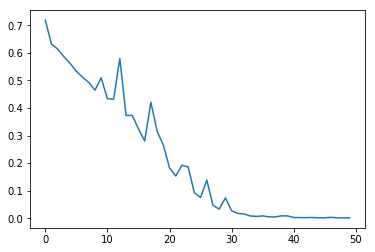

In [34]:
#IMPLEMENTE O CÓDIGO AQUI (1 linha)
plt.plot(range(len(h.history['loss'])), h.history['loss'])

# Compare os resultados obtidos com a Rede Convolucional comparada às Redes Neurais das Atividades 1 e 2

## 3.2. Instruções:

Refaça o treinamento com a topologia acima, **ELIMINANDO a função de Dropout de 50% da Camada densa**

- Otimizador **Adadelta**

    - 1 Camada Convolucional (Conv2D) com 32 Filtros, strides= (1,1) e padding='same' com função de ativação **ReLu**
    - 1 Camada Convolucional (Conv2D) com 64 Filtros, strides= (1,1) e padding='same' com função de ativação **ReLu**
    - 1 Camada MaxPooling2D com janela (2,2)
    - 1 Função de Dropout de 25% (0,25)

    - 1 Função *Flatten*
    - 1 Camada densa com 100 unidades e função de ativação **ReLu**
    - <strike> 1 Função de Dropout de 50% (0,5) </strike>
    - 1 Camada densa com 10  unidades e função de ativação **ReLu**
    - 1 Camada densa com 1   unidade  e função de ativação **Sigmoid**

- Utilize treinamento em lote com **batch_size= 19**
- Limite o treinamento a **50** épocas
- Função de Perda (Loss): **binary_crossentropy** (estamos lidando com classificação binária)    

# Compare os resultados obtidos.

In [35]:
#CÉLULA KE-LIB-11
layers_dims = [12288, 20, 7, 5, 1] # modelo de 4 camadas densas

tf.logging.set_verbosity(tf.logging.ERROR) #desliga os warnings do tensorflow

#Limpa o modelo previamente usado, senão irá acumular camadas
K.backend.clear_session()

#Inicializador
init = K.initializers.glorot_uniform()

#Criando o otimizador
#IMPLEMENTE O CÓDIGO AQUI
theOptimizer = K.optimizers.Adadelta()
#theOptimizer = K.optimizers.RMSprop()

#Construindo o modelo (topologia)
model = K.models.Sequential()

#Camada convolucional - IMPLEMENTE O CÓDIGO AQUI
model.add(K.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1,1), padding='same', kernel_initializer=init, activation='relu', input_shape=(64,64,3)))

#Camada convolucional - IMPLEMENTE O CÓDIGO AQUI
model.add(K.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1,1), padding='same', kernel_initializer=init, activation='relu'))

#MaxPooling - IMPLEMENTE O CÓDIGO AQUI
model.add(K.layers.MaxPooling2D(pool_size=(2, 2))) 

#Dropout de 25% na camada anterior - IMPLEMENTE O CÓDIGO AQUI
model.add(K.layers.Dropout(0.25))

#Camada Densa - IMPLEMENTE O CÓDIGO AQUI
model.add(K.layers.Flatten())
  
#Dropout de 50% na camada anterior - IMPLEMENTE O CÓDIGO AQUI 


#Camada densa - IMPLEMENTE O CÓDIGO AQUI     
model.add(K.layers.Dense(units=100, kernel_initializer=init, activation='relu'))
#Camada densa - IMPLEMENTE O CÓDIGO AQUI     
model.add(K.layers.Dense(units=10, kernel_initializer=init, activation='relu'))
#Camada Densa - IMPLEMENTE O CÓDIGO AQUI
model.add(K.layers.Dense(units=1, kernel_initializer=init, activation='sigmoid'))

#Compile o modelo - IMPLEMENTE O CÓDIGO AQUI 
model.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['acc'])

In [36]:
#IMPLEMENTE O CÓDIGO AQUI
batch_size = 19
max_epochs = 50

print("Iniciando treinamento... ")
h = model.fit(x=X_train, y=y_train.T, batch_size=batch_size, epochs=max_epochs, shuffle=True, verbose=1)

print("Treinamento finalizado \n")

Iniciando treinamento... 
Epoch 1/50
209/209 [==============================] - 7s 32ms/step - loss: 0.7980 - acc: 0.6411
Epoch 2/50
209/209 [==============================] - 6s 26ms/step - loss: 0.5888 - acc: 0.6555
Epoch 3/50
209/209 [==============================] - 6s 26ms/step - loss: 0.5767 - acc: 0.6603
Epoch 4/50
209/209 [==============================] - 6s 27ms/step - loss: 0.6540 - acc: 0.6603
Epoch 5/50
209/209 [==============================] - 6s 27ms/step - loss: 0.6146 - acc: 0.6555
Epoch 6/50
209/209 [==============================] - 6s 27ms/step - loss: 0.5451 - acc: 0.6555
Epoch 7/50
209/209 [==============================] - 6s 26ms/step - loss: 0.4838 - acc: 0.6555
Epoch 8/50
209/209 [==============================] - 6s 26ms/step - loss: 0.4596 - acc: 0.6842
Epoch 9/50
209/209 [==============================] - 6s 27ms/step - loss: 0.4710 - acc: 0.7751
Epoch 10/50
209/209 [==============================] - 6s 27ms/step - loss: 0.4170 - acc: 0.8038
Epoch 11/50
2

In [38]:
eval = model.evaluate(X_train, y_train.T, verbose=0)
print("Erro médio do conjunto de treinamento: Perda {0:.4f}, acuracia {1:.4f}".format(eval[0], eval[1]*100))

eval = model.evaluate(X_test, y_test.T, verbose=0)
print("Erro médio do conjunto de teste: Perda {0:.4f}, acuracia {1:.4f}".format(eval[0], eval[1]*100))

Erro médio do conjunto de treinamento: Perda 0.0001, acuracia 100.0000
Erro médio do conjunto de teste: Perda 0.9962, acuracia 80.0000
